## 1. Introduction

---

Milestone 2

Name : Ogi Hadicahyo

Batch  : HCK - 012 (Phase 1)

Link Hugging Face: <a href="https://huggingface.co/spaces/OgiHadicahyo/Churn_Modelling"> Hugging Face</a>.

---

**Background**

I am a Data Scientist who is currently taking part in a learning program at Hacktive8, Pondok Indah. I found an interesting dataset on Kaggle that contains information about customer churn at a bank. I realized that this dataset was valuable because it could be used to create machine learning models that could predict whether a customer would abandon the bank's services. This model is very useful for banks to take appropriate preventive measures to retain customers and allocate resources more efficiently. By increasing customer retention, banks can increase their revenue from service fees and additional product offerings to loyal customers.

Therefore, I aim to create an optimal machine learning model using several algorithms such as KNN, SVM, Decision Tree, Random Forest, and Boosting, as well as performing hyperparameter tuning to maximize model performance. By having an effective machine learning classification system, banks can develop their business further by predicting potential customers who will leave the service.

**Problem Statement**

Create a predictive machine learning model using KNN, SVM, Decision Tree, Random Forest, and Boosting algorithms, then identify the best model for predicting customers who have the potential to leave bank services. This model helps banks identify customers at high risk of churning, enabling them to take further action to retain customers and prevent potential business losses.

**Dataset**
- Link Dataset: <a href="https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling"> Kaggle</a>.
- Title : Bank Customer Churn

| Column | Description |
| --- | --- |
| RowNumber | Row Numbers from 1 to 10000  |
| CustomerId | Unique Ids for bank customer identification |
| Surname | Customer's last name |
| CreditScore | Credit score of the customer |
| Geography | The country from which the customer belongs |
| Gender | Male or Female |
| Age | Age of the customer |
| Tenure | Number of years for which the customer has been with the bank |
| Balance | Bank balance of the customer |
| NumOfProducts | Number of bank products the customer is utilising |
| HasCrCard | Binary Flag for whether the customer holds a credit card with the bank or not |
| IsActiveMember | Binary Flag for whether the customer is an active member with the bank or not |
| EstimatedSalary | Estimated salary of the customer in Dollars |
| Exited | Binary flag 1 if the customer closed account with bank and 0 if the customer is retained |

## 2. Import Libraries and Function

The first step that needs to be done is ***import libraries***. ***Importing libraries*** makes it easier to reuse code, simplify complex tasks, organize code into smaller parts, use optimal and reliable solutions, and ensure consistency and compatibility across projects and programming languages.

In [4]:
# Library for dataframe and manipulation
import numpy as np
import pandas as pd

# Library for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libaries related to feature engineering
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTENC

# Model
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Model Evaluation and Parameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,  StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, ConfusionMatrixDisplay
from scipy.stats import randint

#library untuk model saving
import pickle

# Library for warnings
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

We have finished importing libraries. Now, we can use these libraries to process the data we have. The next step is data loading

## 3. Data Loading

The data used is default credit card data obtained from Google BigQuery and then saved in CSV form with the file name Bank_Customer_Churn.csv. First of all, we're gonna import the data set .csv file containing the dataset into a Data Frame

In [5]:
# Load the .csv file
data = pd.read_csv('Bank_Customer_Churn.csv')

We will do an initial review of the dataset by displaying the first and last 10 rows. This step aims to get a brief overview of the contents of the dataset that we have.

In [6]:
# Show the first 10 data
print('The first 10 rows data:')
display(data.head(10))

# Show the last 10 data
print('The last 10 rows data:')
display(data.tail(10))

The first 10 rows data:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


The last 10 rows data:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


The table above is the first and last 10 rows of the dataset that we will use. Now, we will look in more detail about our dataset by displaying a summary of the dataset

In [7]:
# Check the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


From this information, it can be concluded that this dataset consists of 10.000 entries and 14 columns. The columns in this dataset are of object and numeric type (both float and integer). There are no missing values in this dataset because the number of rows in each column is 10.000. Therefore, there is no need to handle missing values. However, it is necessary to check whether there are duplicate data in this dataset to ensure optimal use of the data.

In [8]:
# Check the number of columns of integer type
integer_columns = len(data.select_dtypes(include='int64').columns)

# Check the number of columns of float type
float_columns = len(data.select_dtypes(include='float64').columns)

# Check the number of columns of object type
object_columns = len(data.select_dtypes(include='object').columns)

# Displays the number of columns of integer, float, and object types
print(f"Number of columns of integer type: {integer_columns}")
print(f"Number of columns of type float: {float_columns}")
print(f"Number of columns of type object: {object_columns}")

Number of columns of integer type: 9
Number of columns of type float: 2
Number of columns of type object: 3


Based on the observations above, the dataset we have consists of ***2 columns of type float***, ***9 columns of type integer***, and **3 columns of type object**. This dataset also has 3 numerical columns of categorical type

## 4. Exploratory Data Analysis (EDA)

Before we continue we will copy the original dataset in order to keep the real data in case there is something unwanted during the data Exploration process

In [9]:
# Copy dataset for visualization
data_visualization = data.copy()

### 4.1 Distribution Data

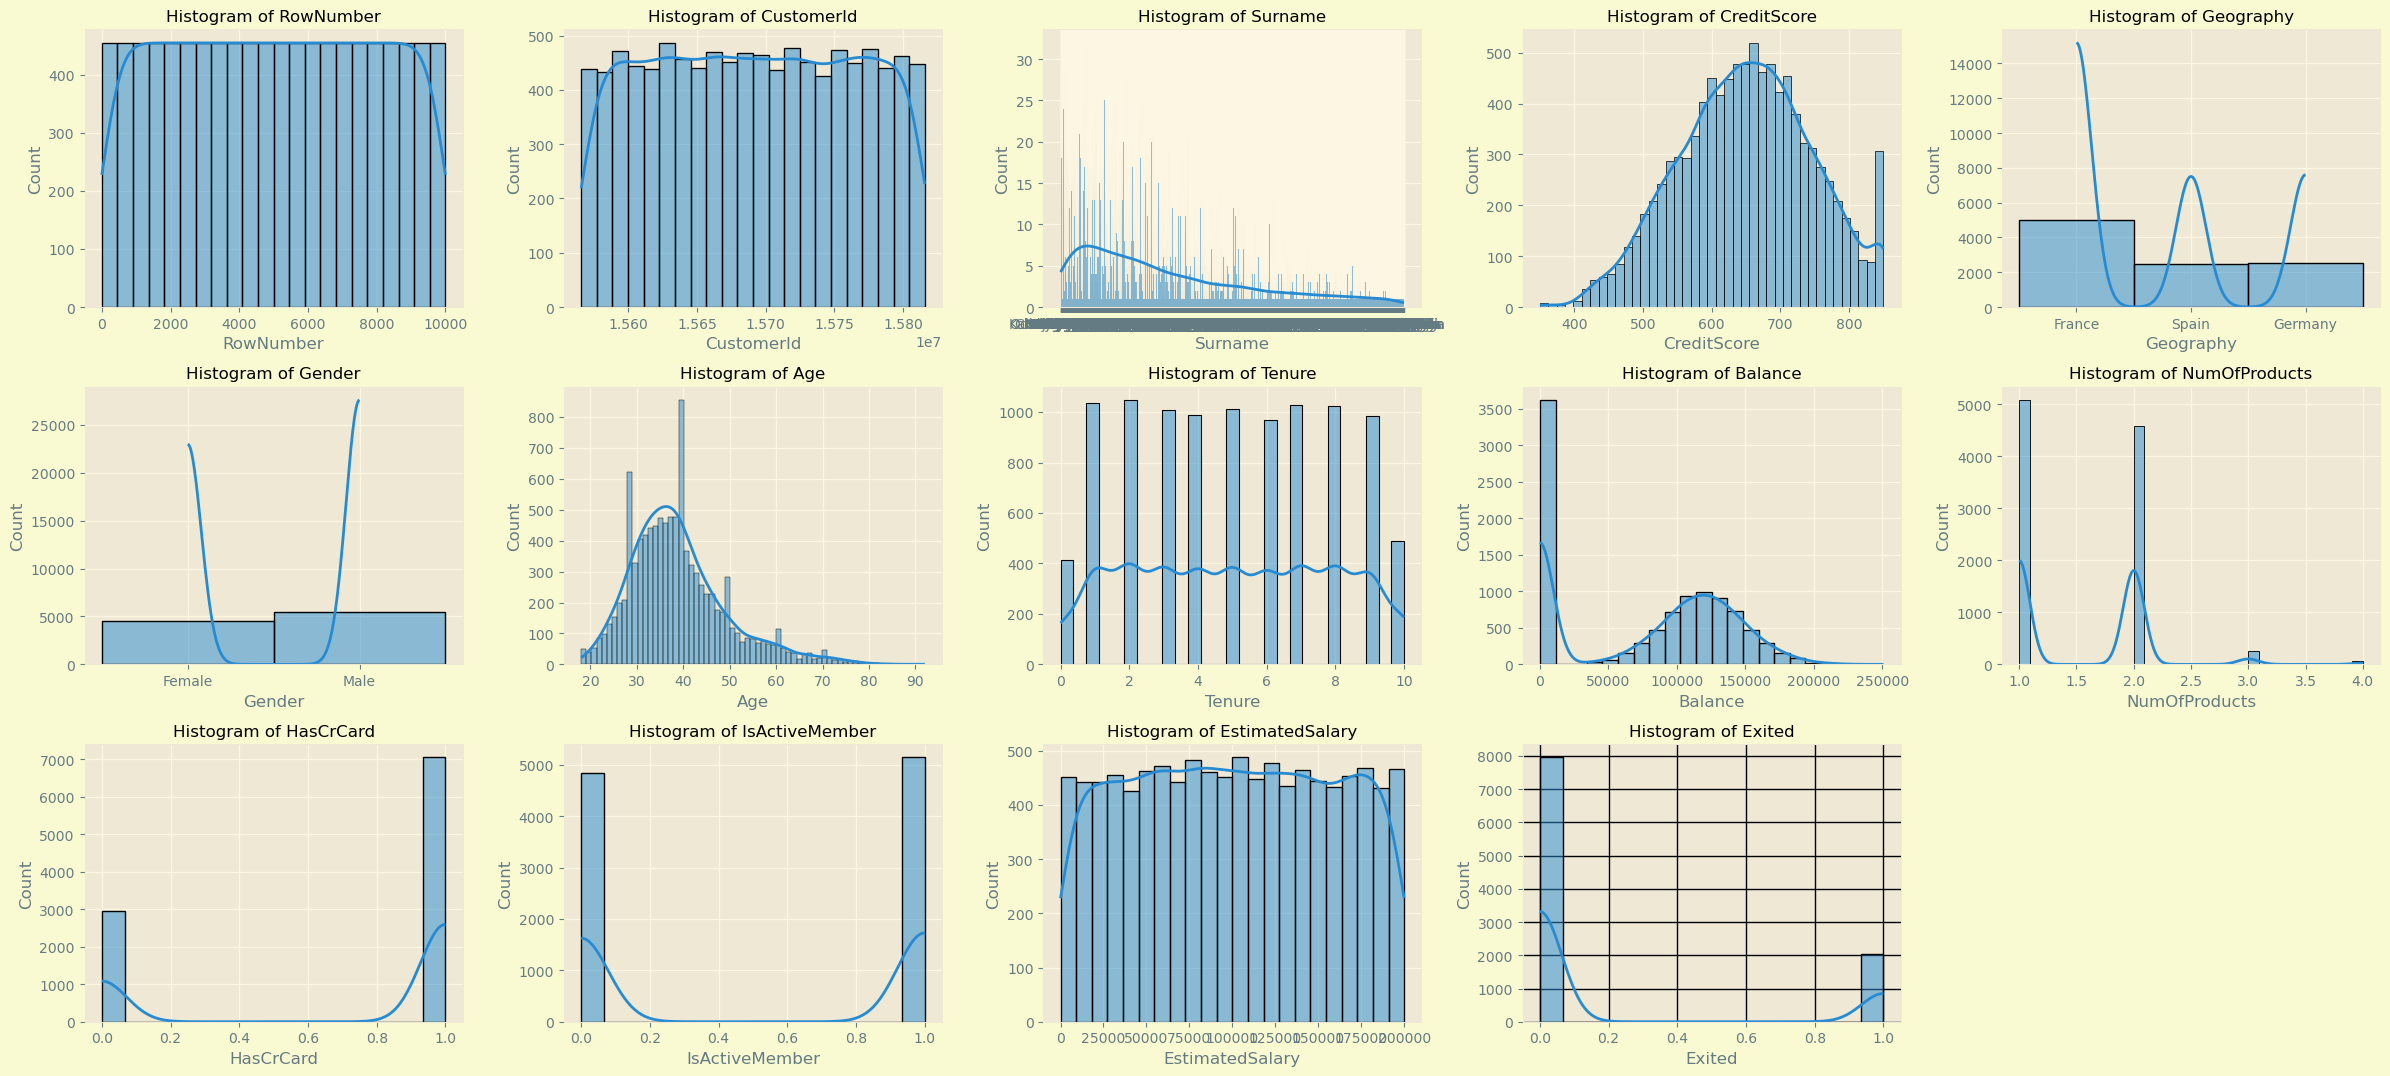

In [10]:
# Create a 24x14 plot
plt.figure(figsize=(24, 14))

# Create a plot with dark background
plt.style.use('Solarize_Light2')

# Iterate through each numeric column in 'data_num'
for i, col in enumerate(data_visualization.columns, 1):
     # Create a subplot with a size of 4 rows x 5 columns and take the i-th subplot number
     plt.subplot(4, 5, i)
    
     # Create histograms and KDE plots using seaborn for the current numeric column
     sns.histplot(data_visualization[col], kde=True)
    
     # Add a title for each subplot based on the column name
     plt.title(f'Histogram of {col}', color='black', fontsize=12)  # Set title color to black

# Set the background color outside the plot area
plt.gcf().patch.set_facecolor('lightgoldenrodyellow')  # Set background color to Solarize_Light2

# Set the color of the grid lines
plt.grid(color='black')

# Set the color of annotations, x-axis, and y-axis labels
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

# Adjust the subplot layout to make it neater
plt.tight_layout()

# Displays the plot
plt.show()

The analysis shows that the majority of customers have credit scores around the middle, with the largest number coming from France, followed by Spain and Germany. Customer ages tend to be young, with a peak around the late 30s. The majority of customers have 1 or 2 products with the bank, as well as having a credit card. The proportions of active and inactive members are nearly equal, and the predicted salary distribution is uniform. The proportion of customers who have left (Exited = 1) is relatively small. This analysis can provide useful insights for customer retention strategies, marketing, and risk assessment in that business context.

### 4.2 Distribution of Chustomer Churn

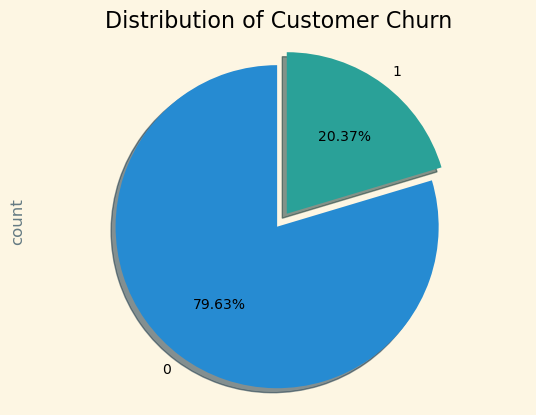

In [11]:
# Create a plot with dark background
plt.style.use('Solarize_Light2')

# Create a pie chart
fig, ax1 = plt.subplots()

# Count the frequency of each 'Exited' using value_counts()
cluster_counts = data_visualization['Exited'].value_counts()
explode = (0.1, 0)  # explode the 1st slice
cluster_counts.plot(kind='pie', autopct='%.2f%%', ax=ax1, shadow=True, explode=explode, startangle=90, textprops={'color':"black"})

# Add a title to the pie chart
plt.title("Distribution of Customer Churn")

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')

# Set background color
ax1.set_facecolor('lightgrey')  

# Display the pie chart
plt.show()

From this visualization, it can be concluded that the dataset has a class imbalance between customers who churn (1) and customers who do not churn (0). The number of customers who did not churn was 79.63% (7963 customers), much more than the number of customers who churned which was only 20.37% (2037 customers).

### 4.3 Relationship of exited customer and Gender

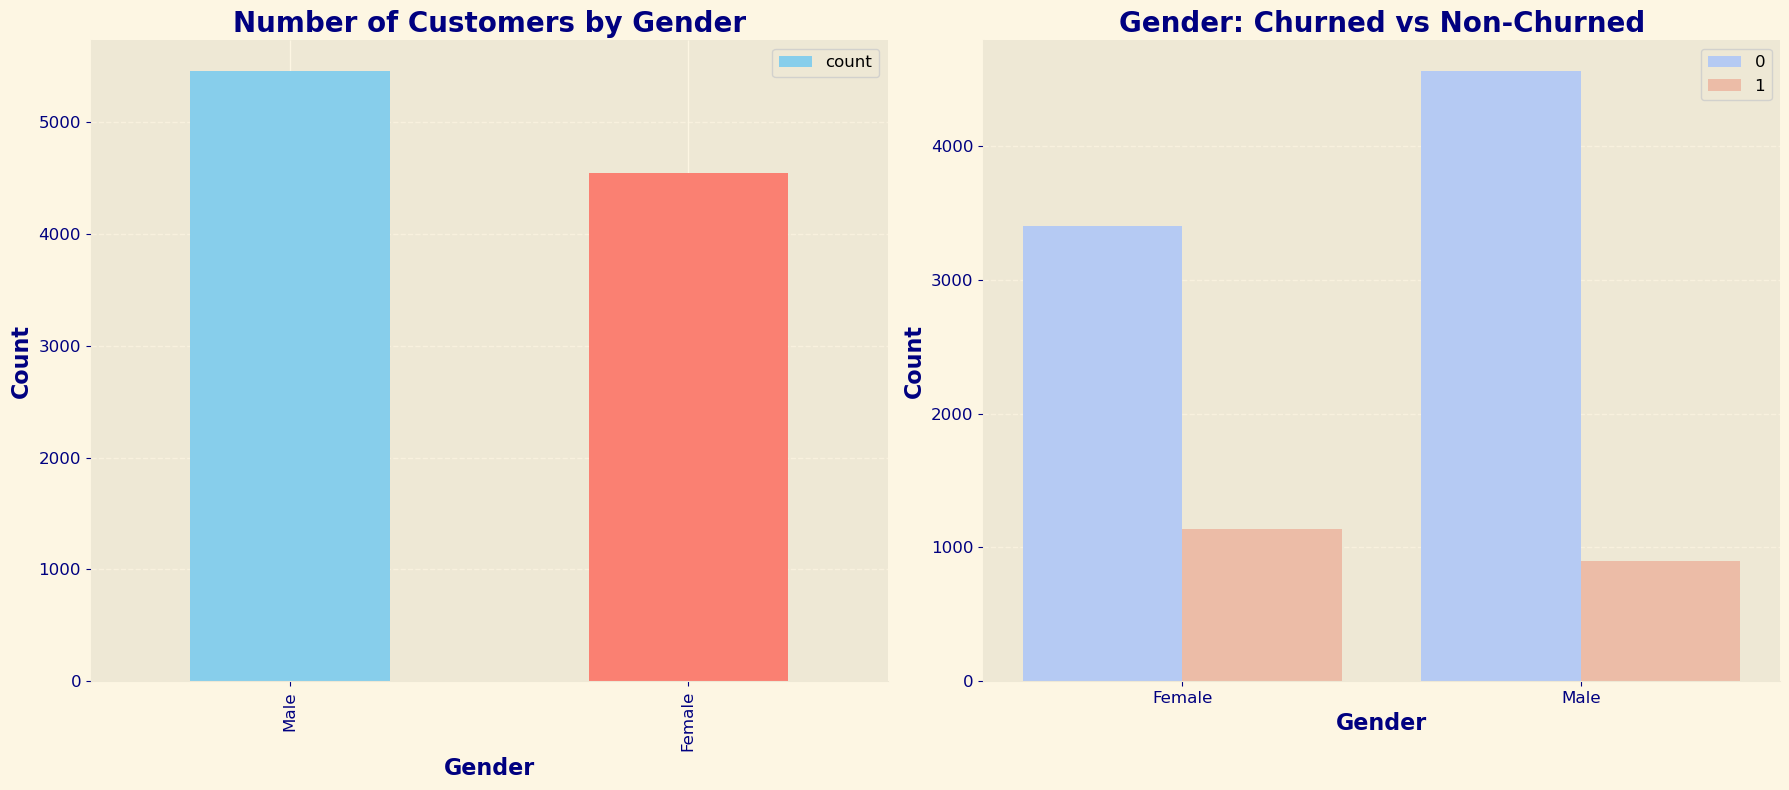

In [12]:
# Creates a subplot with the specified size and image size
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Visualization of the number of customers by gender in the form of a bar plot with an attractive color palette
data_visualization['Gender'].value_counts().plot.bar(color=['skyblue', 'salmon'], ax=ax[0])
ax[0].set_title('Number of Customers by Gender', fontsize=20, fontweight='bold', color='navy')
ax[0].set_ylabel('Count', fontsize=16, fontweight='bold', color='navy')
ax[0].set_xlabel('Gender', fontsize=16, fontweight='bold', color='navy')
ax[0].tick_params(axis='both', labelsize=12, colors='navy')

# Visualization of the relationship between gender and churn in the form of a count plot with an attractive color palette
sns.countplot(data=data_visualization, x='Gender', hue='Exited', ax=ax[1], palette='coolwarm')
ax[1].set_title('Gender: Churned vs Non-Churned', fontsize=20, fontweight='bold', color='navy')
ax[1].set_ylabel('Count', fontsize=16, fontweight='bold', color='navy')
ax[1].set_xlabel('Gender', fontsize=16, fontweight='bold', color='navy')
ax[1].tick_params(axis='both', labelsize=12, colors='navy')

# Adds decoration to the plot
for i in range(2):
     ax[i].grid(axis='y', linestyle='--', alpha=0.7)
     ax[i].spines['top'].set_visible(False)
     ax[i].spines['right'].set_visible(False)
     ax[i].legend(fontsize=12)

# Displays the plot
plt.tight_layout()
plt.show()

There are **more male customers than female customers**, with a difference of 1,000 customers. However, **the churn rate (quit rate) is almost the same for men and women**, with a difference of about 200 customers. This shows that the probability of quitting male and female customers tends to be equal.

### 4.4 Visualization Age Group That Prefer To Churn

Text(0, 0.5, 'percentage')

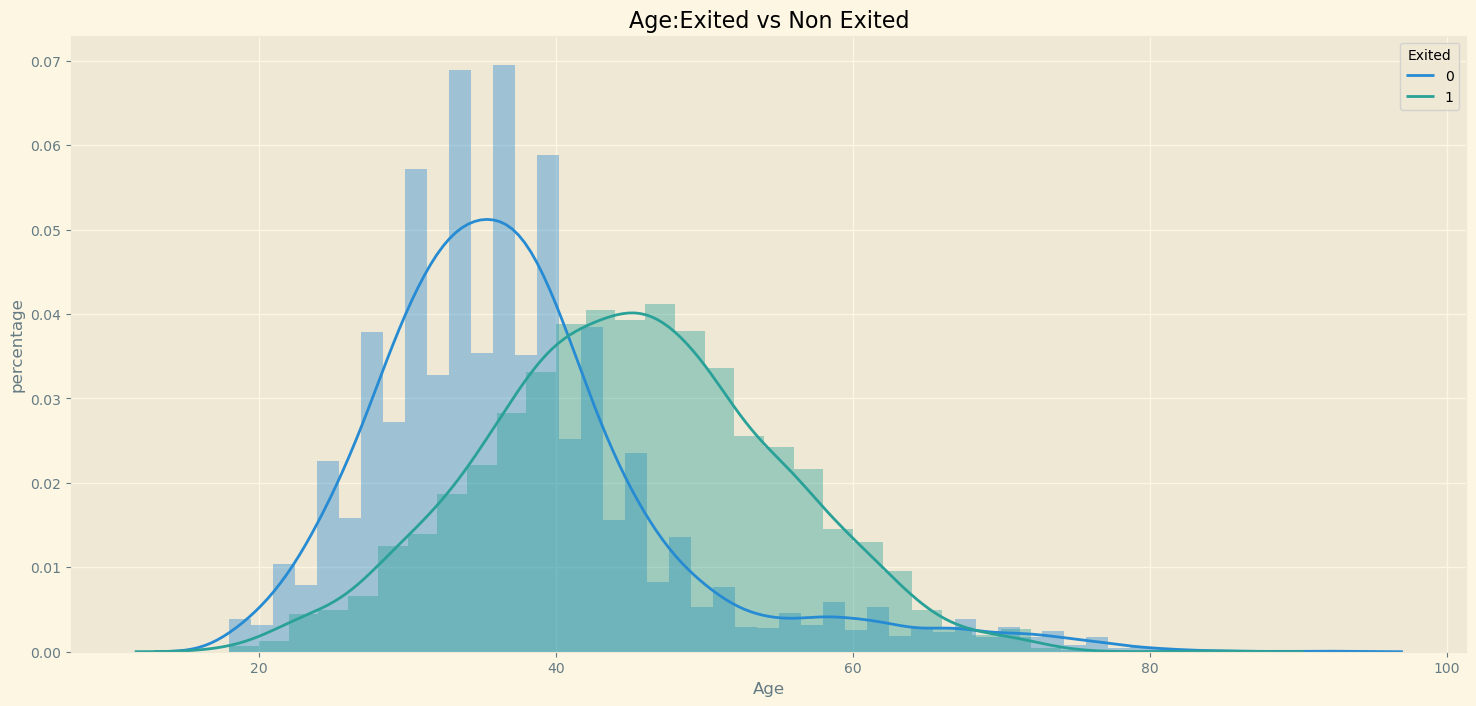

In [13]:
# Divide data_visualization into two groups based on the Exited column
Non_Exited = data_visualization[data_visualization['Exited']==0]
Exited = data_visualization[data_visualization['Exited']==1]

# Create a visualization of the age distribution between two groups of customers in the form of a histogram
plt.subplots(figsize=(18,8))
sns.distplot(Non_Exited['Age'])
sns.distplot(Exited['Age'])
plt.title('Age:Exited vs Non Exited')   
plt.legend([0,1],title='Exited')
plt.ylabel('percentage')

Based on the visualization results, the age distribution of customers who have left the bank tends to be right skewed. This shows that *the majority of customers who leave the bank have various ages and are evenly distributed, while the majority of customers who remain at the bank tend to be younger.* In addition, it can be concluded that **the above age group 40 year olds are more likely to leave the bank.**

### 4.5 Customer Distribution in Various Countries

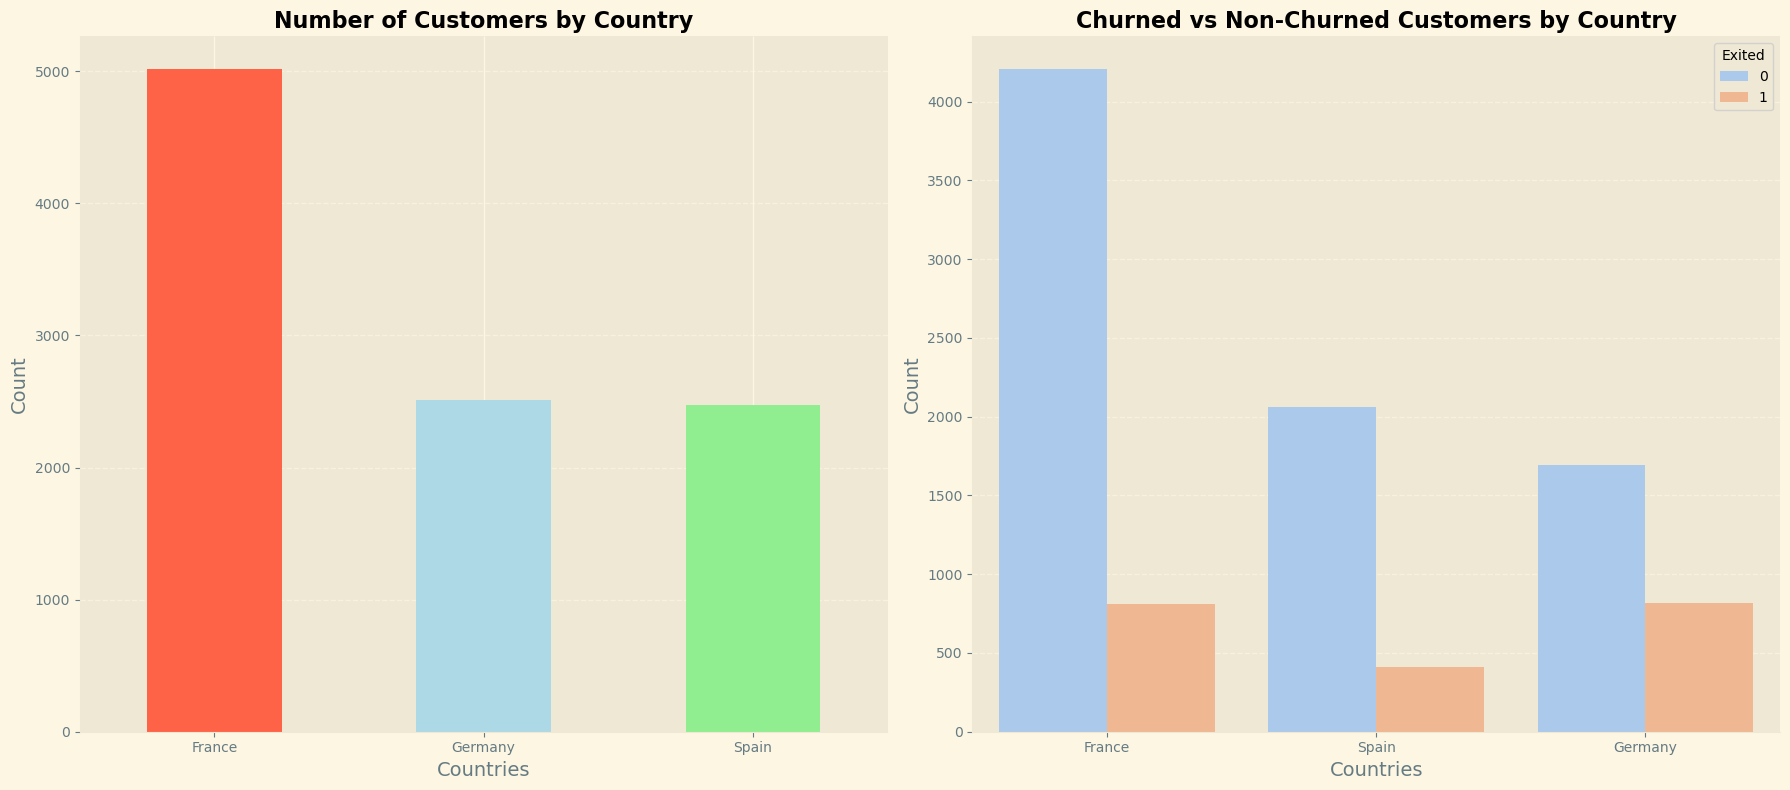

In [14]:
# Create subplots
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Plot number of customers by countries
colors = ['#FF6347', '#ADD8E6', '#90EE90']
data_visualization['Geography'].value_counts().plot.bar(color=colors, ax=ax[0])  # Changed colors
ax[0].set_title('Number of Customers by Country', fontsize=16, fontweight='bold')  # Added title with bold font
ax[0].set_ylabel('Count', fontsize=14)  # Increased font size
ax[0].set_xlabel('Countries', fontsize=14)  # Increased font size

# Plot countries: Exited vs Non-Exited
sns.countplot(data=data_visualization, x='Geography', hue='Exited', ax=ax[1], palette='pastel')  # Used seaborn palette
ax[1].set_title('Churned vs Non-Churned Customers by Country', fontsize=16, fontweight='bold')  # Added title with bold font
ax[1].set_ylabel('Count', fontsize=14)  # Increased font size
ax[1].set_xlabel('Countries', fontsize=14)  # Increased font size

# Add grid and remove spines
for i in range(2):
    ax[i].grid(axis='y', linestyle='--', alpha=0.7)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].tick_params(axis='x', rotation=0)

# Show plot
plt.tight_layout()  # Adjust layout
plt.show()

France has the largest number of customers and also the number of customer churn is almost equal to the number in Germany, showing that despite having a large market, the churn rate (the number of customer churn) remains high in Germany. On the other hand, Germany and Spain have almost the same number of customers. However, the number of customer churn in Spain is the lowest of the three countries. This shows that even though Spain has a small market, it can do a good job of preventing churn.

### 4.6 Impact of Estimated Salary on customer churn

Text(0, 0.5, 'Customer')

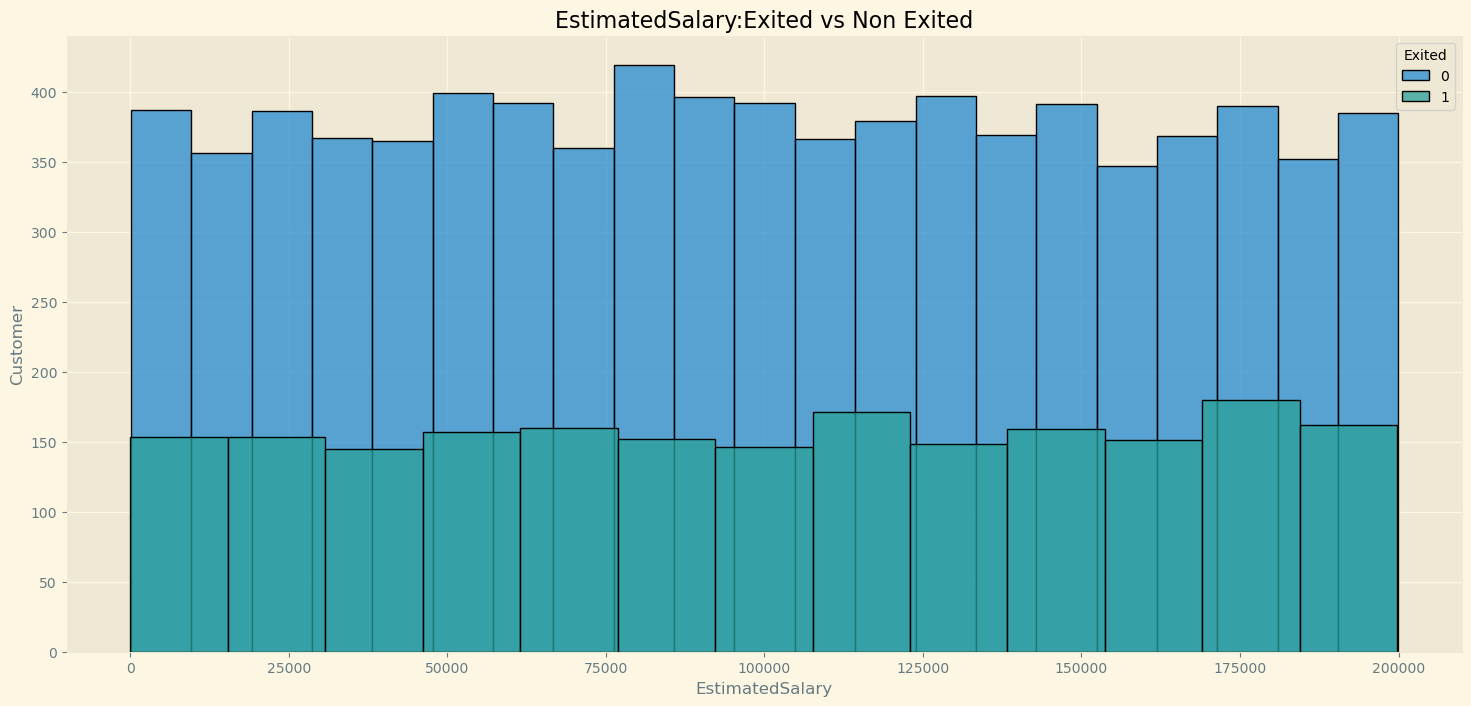

In [15]:
# Divide data_visualization into two groups based on the Exited column
Non_Exited = data_visualization[data_visualization['Exited']==0]
Exited = data_visualization[data_visualization['Exited']==1]

# Create a visualization of the Estimated Salary distribution between two groups of customers in the form of a barplot
plt.subplots(figsize=(18,8))
sns.histplot(Non_Exited['EstimatedSalary'])
sns.histplot(Exited['EstimatedSalary'])
plt.title('EstimatedSalary:Exited vs Non Exited')
plt.legend([0,1],title='Exited')
plt.ylabel('Customer')

It can be seen that the number of customers who have not yet left (in blue) is much higher across the salary range compared to those who have already left (in green). The distribution of customers who have not left appears relatively even, indicating that the decision to stay is not strongly correlated with a particular salary range. Although the number of customer exits showed a slight increase in the middle salary range, overall there were fewer customer exits across the salary range compared to those who had not left.

## 5. Feature Engineering

Before going any further, let's copy the data that we will use in building the model. This is done to avoid things that we don't want in the original data. The data that has been previously loaded will be entered into a new variable where the data in that variable will be processed

In [16]:
# copy the original data set
df = data.copy()

---
### 5.1 Handling Duplicate Data

Handling duplicate data is done to detect, delete, or mark duplicate rows in the dataset. This is done to ensure data integrity and prevent excessive or biased information in the analysis, as well as prepare data that is clean and suitable for further analysis or modeling processes.

In [17]:
# Check for duplicates data
df.duplicated().sum()

0

From the results of checking duplicate data, we find that there is no duplicate data in the dataset. So, we can use the dataset and proceed to the next step

---
### 5.2 Cardinality Checking

The function of the cardinality check is to evaluate the number of unique values or cardinality of a feature (column) in the dataset. This is important because high cardinality, that is, a large number of unique values, can cause some problems in data analysis and model building.

In this dataset, we will perform a cardinality check on categorical columns

In [18]:
# set colwidth hidher
pd.set_option('display.max.colwidth', None)

cat_cols = ['Surname', 'Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

# Create a looping for unique values details
listItem = []
for col in cat_cols :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

# Show the dataframe
pd.DataFrame(columns=['Column Name', 'Number of Unique Values', 'Unique Values'], data=listItem)

,Column Name,Number of Unique Values,Unique Values
0,Surname,2932,"[Hargrave, Hill, Onio, Boni, Mitchell, Chu, Bartlett, Obinna, He, H?, Bearce, Andrews, Kay, Chin, Scott, Goforth, Romeo, Henderson, Muldrow, Hao, McDonald, Dellucci, Gerasimov, Mosman, Yen, Maclean, Young, Nebechi, McWilliams, Lucciano, Azikiwe, Odinakachukwu, Sanderson, Maggard, Clements, Lombardo, Watson, Lorenzo, Armstrong, Cameron, Hsiao, Clarke, Osborne, Lavine, Bianchi, Tyler, Martin, Okagbue, Yin, Buccho, Chidiebele, Trevisani, O'Brien, Parkhill, Yoo, Phillipps, Tsao, Endrizzi, T'ien, Velazquez, Hunter, Clark, Jeffrey, Pirozzi, Jackson, Hammond, Brownless, Chibugo, Glauert, Pisano, Konovalova, McKee, Palermo, Ballard, Wallace, Cavenagh, Hu, Read, Bushell, Postle, Buley, Leonard, Mills, Onyeorulu, Beit, Ndukaku, Gant, Rowley, Sharpe, Heap, Ritchie, Cole, Capon, Fiorentini, Graham, Yuille, Allard, Fanucci, Fu, Hung, ...]"
1,Geography,3,"[France, Spain, Germany]"
2,Gender,2,"[Female, Male]"
3,Tenure,11,"[2, 1, 8, 7, 4, 6, 3, 10, 5, 9, 0]"
4,NumOfProducts,4,"[1, 3, 2, 4]"
5,HasCrCard,2,"[1, 0]"
6,IsActiveMember,2,"[1, 0]"


We have carried out cardinality checking on each column and from the test results, it is known that:

- **Surname :** Have 2932 Unique Values

- **Geography :** Have 3 Unique Values (France, Spain, Germany)

- **Gender :** Have 2 Unique Values (Female, Male)

- **Tenure :** Have 11 Unique Values (Value 0 - 10)

- **NumOfProducts :** Have 4 Unique Values (Value 1 - 4)

- **HasCrCard :** Have 2 Unique Values (Binary between 0 and 1)

- **IsActiveMember :** Have 2 Unique Values (Binary between 0 and 1)

Analysis of the cardinality of the features in the dataset shows significant variation in the feature “Surname” with 2932 unique values, while the feature “Geography” has low cardinality with only 3 unique values (French, Spanish, German), and the feature “Gender” has low cardinality very low with only 2 unique values (Female, Male). The feature "Tenure" has 11 unique values, "NumOfProducts" has 4 unique values, and the features "HasCrCard" and "IsActiveMember" are binary features with 2 unique values each. 

Apart from the 'Surname' column, the other columns are low cardinality so we will leave these two columns. We will remove the 'Surname' column from the feature. Apart from the high cardinality, based on domain knowledge this column will not contribute more to modeling later because it only contains the identity of the customer and has the potential to reduce the optimality of the model in making predictions.

---
### 5.3 Data Splitting

To create a machine learning model, we need to divide the data into two parts, namely the one we want to predict/target (y) and the one to predict/feature (X)

In [19]:
# Define the X and y
# Separating independent variables (features) and dependent variables (targets)
X = df.drop(['RowNumber', 'Exited'], axis=1)
y = df['Exited']

After separating the data into features (X) and targets (y), the next step is to divide them into training data (for model learning) and test data (for model evaluation). With a large amount of data, namely 10,000 rows, we chose to increase the training data so that the model could understand the data patterns better and provide more accurate predictions. **Data division is carried out in a 70:30 ratio**, where 70% of the total data is used as training data and 30% as test data. 

The **random state used for data division is 22**. The use of this random state is important because it ensures that the results of data division will always be the same every time the code is executed with the same random state, which is useful for maintaining reproducibility of analysis results.

**Stratify** in data splitting (train_test_split) **is used to ensure that the distribution of class proportions in the target data is maintained proportionally between the training set and the test set.** stratify=y will ensure that the target classes in the dataset will be distributed uniformly between the two resulting data sets (train and test), thus representing the diversity of classes that exist in the original data.

In [20]:
# Separating data into a training set (train) and a test set (test)
# With a ratio of 70:30 and seed (random_state) 22 for reproducible results
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, stratify=y, random_state=22)

# Check the size
print(f"Shape data train : {X_train.shape}")
print(f"Shape data test : {X_test.shape}")

Shape data train : (7000, 12)
Shape data test : (3000, 12)


We have finished dividing the train data and test data. In other words, the ***training data has 7.000 samples and 12 features***, while the ***test data has 3.000 samples and 12 features***. The same number of columns between the training data and the test data indicates that the two datasets have the same structure in terms of the features used for training and testing the model.

---
### 5.4 Handling Outlier

To deal with outliers, we will first look at the numeric column visualization to see if the numeric data has any outliers. First, We will use box plots to visualize the distribution of numerical data. This is done to see the actual information from the column so that we can find out whether there are outliers in the column. **We will exclude the columns 'NumOfProducts', 'HasCrCard', and 'IsActiveMember'**. Even though the values are numbers, the actual values are binary for the 'HasCrCard' and 'IsActiveMember' columns and ordinal for 'NumOfProducts'

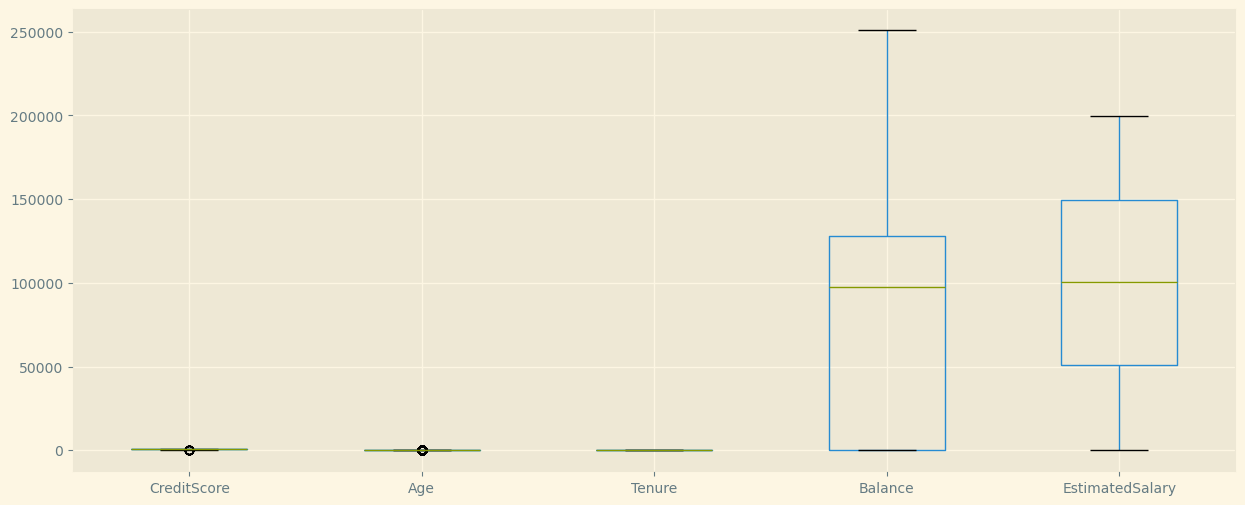

In [21]:
# Create a boxplot before handling outliers
plt.figure(figsize=(15, 6))
X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']].boxplot()
plt.show()

From the visualization above, it can be seen that there are outliers only in the 'CreditScore' and 'Age' column. Apart from looking at the visualization, we will make sure there are outliers based on the distribution. We will do calculations to find out the column distribution

In [22]:
# Create function to search the skew value, upper and lower boundaries, and outlier flag
def outlier_analysis(data):

    # create the dataframe and empty lists
    result = pd.DataFrame()
    col_name = []
    skew = []
    upper = []
    lower = []
    has_outliers = []  # New list to indicate if a column has outliers

    # Loop for the column
    for col in data.columns:
        col_name.append(col)

        # Calculate Skewness
        skew_val = data[col].skew()
        skew.append(skew_val)

        # Highly Skewed Upper and Lower Boundaries
        if skew_val > 1 or skew_val < -1:
            IQR = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].quantile(0.25) - (IQR * 3)
            upper_boundary = data[col].quantile(0.75) + (IQR * 3)

        # Moderatly Skewed
        elif skew_val > 0.5 or skew_val < -0.5:
            IQR = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].quantile(0.25) - (IQR * 1.5)
            upper_boundary = data[col].quantile(0.75) + (IQR * 1.5)

        # Normal Distribution
        else :
            std = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].mean() - (std * 3)
            upper_boundary = data[col].mean() + (std * 3)
        
        # Append the upper and lower value
        upper.append(upper_boundary)
        lower.append(lower_boundary)

        # Check for outliers
        outliers = (data[col] < lower_boundary) | (data[col] > upper_boundary)
        has_outliers.append(any(outliers))
    
    # Add into the dataframe
    result['columns'] = col_name
    result['skewness'] = skew
    result['upper boundary'] = upper
    result['lower boundary'] = lower
    result['has_outliers'] = has_outliers  # Add the has_outliers column

    return result


After making calculations to find out the distribution of data in the column, we will use these calculations in the 'CreditScore', 'Age', 'Tenure', 'Balance', and 'EstimatedSalary' column to find out the distribution

In [23]:
# Select the data except categorical and target columns
outlier_check = X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']]

# Check the data skewness and boundaries
outlier_analysis(outlier_check)

,columns,skewness,upper boundary,lower boundary,has_outliers
0,CreditScore,-0.088993,1052.846143,248.846143,False
1,Age,1.000089,80.000000,-4.000000,True
2,Tenure,0.030405,19.973571,-10.026429,False
3,Balance,-0.151952,460317.578403,-307069.551597,False
4,EstimatedSalary,-0.006514,397438.702763,-196423.297237,False


Even though in the visualization using a boxplot the 'CreditScore' and 'Age' column has a few outliers, from the results of statistical calculations it was found that there are only outliers in the 'Age' column. Apart from that, the other columns also have no outliers in each column. Therefore, we will leave the existing data and only handle outliers in the 'Age' column. Because the skewness value is more than 1.0, it indicates that the data distribution is extreme skew. Therefore, **we will use the capping method using the Interquartile Range (IQR) with fold = 3 on both tail**. To deal with outliers in the data, **we will apply the winsorizer technique.**

**Winsorizer is a statistical technique used to handle outliers in data by replacing extreme values with more moderate values**, namely by using values at certain percentiles of the data distribution. The use of winsorizer is important because outliers in the data can have a significant impact on statistical analysis and model results.

In [24]:
# Capping the skewed distribution
winsoriser_fare = Winsorizer(capping_method='iqr',tail='both',fold=3,variables=['Age'])

X_train = winsoriser_fare.fit_transform(X_train)
X_test_capped = winsoriser_fare.transform(X_test)

After capping the data, We will use a box plot to visualize again the distribution of the numerical data . This is done to see information from this column so that we can find out the data distribution after capping

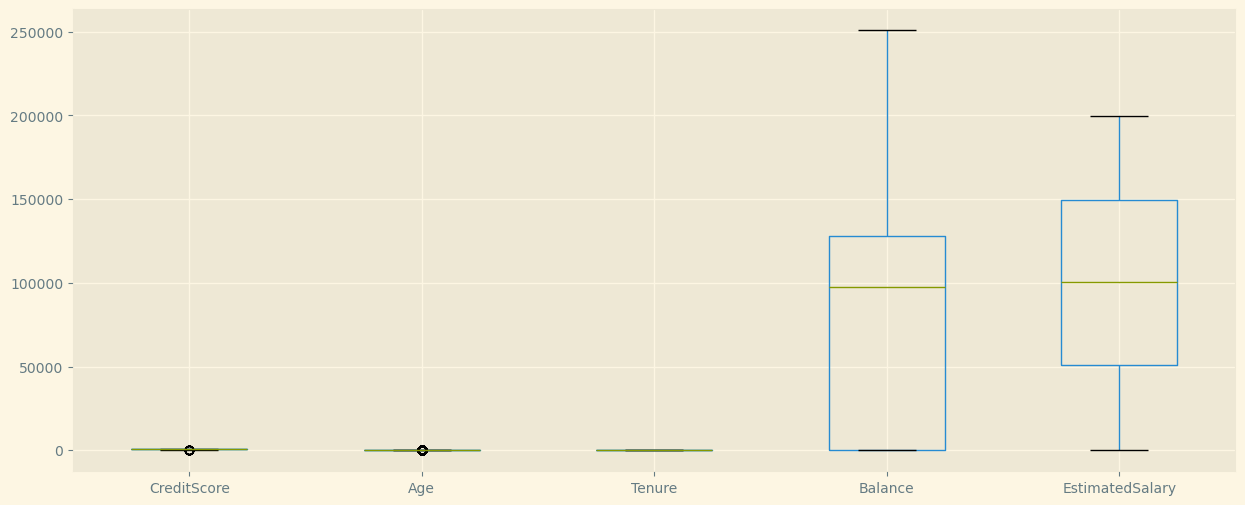

In [25]:
# Create a boxplot before handling outliers
plt.figure(figsize=(15, 6))
X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']].boxplot()
plt.show()

Based on the boxplot above, it can be seen that there are only a few outliers remaining in the numerical features. We will move on to the next stage

---
### 5.5 Feature Selection

To test the correlation of data in the dataset against 'Exited', we can use the correlation test method where we will find out which target column has a correlation with which numeric and categorical columns. ***To see the correlation value between the columns***, we will use ***statistical tests*** to get the p-value between the two columns

#### 5.5.1 Numerical

To find the correlation between the target and the numerical column , we need to first ***determine which columns fall into the numerical category*** and put them into one variable to make it easier for us to process the data.

In [26]:
# Create a list containing other numeric columns
numeric_column = ['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# Create a new variable named df_numeric which contains other numeric column 
numeric = X_train[numeric_column]

We know that the target column we want to search for from this dataset is of the categorical type. After determining which features are of the numerical type, we will carry out a correlation test. ***Correlation that is suitable to use to determine the correlation between numerical and categorical columns is Spearman***

**Spearman:** denoted as ρ (rho), measures the monotonic relationship between variables. ***It does not assume aspecific distribution*** for the data and is ***appropriate for variables that may not have a linear relationship***. It is ***less sensitive to outliers*** and ***can capture non-linear relationships***.

In [27]:
# Create a loop to test the correlation between the categorical column and 'price' using the kendalltau technique
for i in numeric:
     
    corr, pval = stats.spearmanr(X_train[i],y_train)
    print(f"Correlation between {i} with Exited")
    print(f"Correlation Value :{corr}")
    if pval < 0.05:
        print(f"P-value :{pval} -> Both columns have a correlation")
    else:
        print(f"P-value :{pval}")

    print('==================================================================')

Correlation between CustomerId with Exited
Correlation Value :-0.002061239248564758
P-value :0.8631033930858242
Correlation between CreditScore with Exited
Correlation Value :-0.017397056814782468
P-value :0.14556066075658008
Correlation between Age with Exited
Correlation Value :0.32746704642106145
P-value :1.240597462613524e-174 -> Both columns have a correlation
Correlation between Tenure with Exited
Correlation Value :-0.009962855468298313
P-value :0.4046055800502403
Correlation between Balance with Exited
Correlation Value :0.1140861493830257
P-value :1.021512999426947e-21 -> Both columns have a correlation
Correlation between NumOfProducts with Exited
Correlation Value :-0.10540430669968234
P-value :9.417121474598283e-19 -> Both columns have a correlation
Correlation between HasCrCard with Exited
Correlation Value :-0.008652473383201199
P-value :0.4691872234964294
Correlation between IsActiveMember with Exited
Correlation Value :-0.1616853105880041
P-value :3.269632939540118e-42 

Based on the results of the Spearman test for the numerical column group, several columns were found that had a correlation with the taget **default_payment_next_month** when viewed from the p-value. Columns that have a p-value < 0.05 are interpreted as having a correlation between the columns. Therefore, we can conclude that there are 5 columns that have correlation with the **'Exited'** column, namely the **'Age'**, **'Balance'**, **'IsActiveMember'**, and **'EstimatedSalary'** columns

#### 5.5.2 Categorical

To find the correlation between the target and the categorical column, we need to first ***determine which columns fall into the categorical category*** and put them into one variable to make it easier for us to process the data.

In [28]:
# Grouping categorical columns into one variable
categorical = ['Surname', 'Geography', 'Gender']

After identifying categorical features, the next step is to carry out a correlation test because the target column in this dataset is a category. **The appropriate correlation to determine the relationship between two category columns is Kendall.**

**Kendall**: symbolized by τ (tau), also measures the strength of the monotonic relationship between variables. This correlation **does not require assumptions about a particular data distribution**, is robust to outliers, and can handle non-linear relationships. **Usually used when the variable being tested is categorical or ordinal**. The Kendall technique is used to test the correlation between the category column and the price column because it does not require a normal data distribution. Additionally, this technique is suitable for testing the correlation between target and category columns.

In [29]:
# Create a loop to test the correlation between the categorical column and 'price' using the kendalltau technique
for i in categorical:
     
    corr, pval = stats.kendalltau(X_train[i],y_train)
    print(f"Correlation between {i} with Exited")
    print(f"Correlation Value :{corr}")
    if pval < 0.05:
        print(f"P-value :{pval} -> Both columns have a correlation")
    else:
        print(f"P-value :{pval}")

    print('==================================================================')

Correlation between Surname with Exited
Correlation Value :-0.009150776879762809
P-value :0.3486757030033045
Correlation between Geography with Exited
Correlation Value :0.058391086486208985
P-value :2.6306110189691614e-07 -> Both columns have a correlation
Correlation between Gender with Exited
Correlation Value :-0.11365396457571111
P-value :1.9381546669462402e-21 -> Both columns have a correlation


Based on the results of the Kendall Tau test for the categorical column group, several columns were found that had a correlation with the taget **Exited** when viewed from the p-value. Columns that have a p-value < 0.05 are interpreted as having a correlation between the columns. Therefore, we can conclude that there are 2 columns that have correlation with the **'Exited'** column, namely the **'Geography'** and **'Gender'** columns

#### 5.5.3 Dropping columns that have no correlation

We have performed a correlation test between each numeric and categorical column with the 'Exited' column. **There are 5 columns that have no correlation with the target, namely the 'Surname', 'CustomerId', 'CreditScore', 'Tenure', and 'HasCrCard' columns**. We will delete columns that have no correlation with the 'Exited' column and only leave columns that have a correlation with the 'Exited' column using a pipeline in the next stage.

---
### 5.6 Handling Imbalance

As we found during the EDA process, we found that our data is imbalance. Therefore, we will do `SMOTE-NC` in the dataset to help the model perform better. We consider this method since we have categorical data in the dataset as well

In [30]:
smotenc = SMOTENC([1,3,4], random_state = 22)
X_train_balanced, y_train_balanced = smotenc.fit_resample(X_train, y_train)
y_train_balanced.value_counts()

Exited
0    5574
1    5574
Name: count, dtype: int64

It can be seen from the SMOTENC results that the amount of data is balanced

--- 
### 5.7 Encoding and Scaling

The numerical data is not on the same scale, so we need a scaler to help the model perform better. In this process, we will use **Standard Scaler** as the scaling method and combine it later in the pipeline to avoid data leakage since it can be a good practice even after handling outliers. For the categorical we will try to use **One Hot Encoder** since our data is nominal type

**StandardScaler is a feature scaling technique used in data analysis and statistical modeling to transform numerical features so that they have a mean of zero and a variance of one.** By using StandardScaler, we ensure that each feature in the dataset contributes proportionally to the learning process, without letting the effects of varying scales or magnitudes interfere with the interpretation or performance of the model.

**OneHotEncoder is an coding technique used in data processing to convert categorical variables into binary representations called one-hot vectors.** This method is used when the values of a categorical column are not levels of each other

In [31]:
# Define the Scaling method
scaler = StandardScaler()

# Define the Encoder
encoder = OneHotEncoder(handle_unknown='ignore')

we already define the scaler and encoder method, now we will prepare the column transformer. The aim is to put the transformer into the pipeline to make our modeling process is efficient

In [32]:
# Columns that will be passed through without transformation
passthrough_columns = ['NumOfProducts', 'IsActiveMember']

# Columns that will be dropped
drop_columns = ['Surname', 'CustomerId', 'CreditScore', 'Tenure', 'HasCrCard']

# Columns that will be scaled
scaled_columns = ['Age', 'Balance', 'EstimatedSalary']

# Columns that will be encoded
encoded_columns = ['Geography', 'Gender']

# Define the preprocessing steps for each type of column
passthrough_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')) # Impute missing values if any
])

scaling_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()) # Standardize the numerical features
])

encoding_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore')) # Encode categorical features
])

# Create ColumnTransformer to apply different preprocessing steps to different columns
preprocessor = ColumnTransformer(transformers=[
    ('passthrough', passthrough_transformer, passthrough_columns),
    ('scaling', scaling_transformer, scaled_columns),
    ('encoding', encoding_transformer, encoded_columns),
    ('drop', 'drop', drop_columns) # Drop specified columns
])

## 6. Model Definition

In the modeling that we will do, the model we will use is KNN, SVM, Decision Tree, Random Forest, and Boosting. 
    
1. **K-Nearest Neighbors (KNN) :** KNN is an instance-based learning algorithm that predicts the label of an instance based on the majority of labels of its k-nearest neighbors in feature space, where k is a predetermined number of neighbors.

2. **Support Vector Machine (SVM) :** SVM is a supervised learning algorithm used for classification and regression problems. SVM searches for a hyperplane that optimally separates two classes in feature space by maximizing the margin, which is the distance between the hyperplane and the closest instance of each class.

3. **Decision Tree :** Decision Tree is a tree-based learning algorithm that divides the feature space into increasingly smaller and homogeneous subsets based on feature values. At each decision node, the Decision Tree selects the most informative features to divide the data into subsets, thereby making decisions based on the tree structure.

4. **Random Forest :** Random Forest is an ensemble algorithm that combines multiple Decision Trees to improve prediction performance. Random Forest works by creating many random Decision Trees, each with a randomly drawn subset of data and features, and combining the prediction results from all Decision Trees to produce a final prediction.

5. **Boosting :** Boosting is an ensemble technique that combines several weak models to form a strong model. There are several popular Boosting algorithms, including AdaBoost, Gradient Boosting, and XGBoost. Boosting works by strengthening the weights of instances that were incorrectly predicted by the previous model, so that subsequent models focus on instances that were difficult to predict.  
    * **The Boosting algorithm that will be used in this classification is XGBoost.** XGBoost (Extreme Gradient Boosting): Is a highly efficient implementation of the Gradient Boosting algorithm optimized for performance and scalability. XGBoost uses regularization techniques to control model complexity and prevent overfitting, and leverages parallel structures to run the learning process faster. We use this algorithm because this algorithm is the most efficient and optimal algorithm compared to other algorithms


In [32]:
# Define the Random Forest Classifier with a random state
random_forest_model = RandomForestClassifier(random_state=22)

# Define the Support Vector Machine (SVM) Classifier with a random state
svm_model = SVC(random_state=22)

# Define the K-Nearest Neighbors (KNN) Classifier with a random state
knn_model = KNeighborsClassifier()

# Define the Decision Tree Classifier with a random state
decision_tree_model = DecisionTreeClassifier(random_state=22)

# Define the XGBoost Classifier with a random state
xgboost_model = xgb.XGBClassifier(random_state=22)

**Metric :**

In this project, **the main goal was to minimize the number of cases where the model failed to identify potential churning customers**. The focus on **Recall and ROC-AUC metrics** aligns with the bank's business goal of proactively predicting churn to reduce customer loss.

High recall indicates the model's ability to identify customers who are truly churning, while ROC-AUC helps evaluate the model's ability to differentiate between customers who are likely to churn and those who are not. **By prioritizing Recall and ROC-AUC, banks can effectively target customers at risk of churn and increase overall customer retention.**

## 7. Model Training

The training process will utilize cross-validation within grid search cross-validation to identify the most optimal model. Afterward, we will choose the best-performing model and proceed with hyperparameter tuning to further improve its performance.

Some descriptions of the parameters used:
- **return_train_score:** This parameter determines whether to return the training score from each cross-validation split.
- **refit:** This parameter determines whether to retrain the best model on the entire data after the grid search process is complete.

In [33]:
# Model list
models = {'model' : [random_forest_model, svm_model, knn_model,
                     decision_tree_model, xgboost_model]}

# Building pipeline
estimators = Pipeline([
    ('preprocess', preprocessor),
    ('model', models)])

# Initialize Stratified K-Fold cross-validator
skfold = StratifiedKFold(n_splits=5)

# Model Benchmarking using Grid Search
search = GridSearchCV(
    estimator=estimators,
    param_grid=models,
    scoring=['recall', 'roc_auc'],
    cv=skfold,
    return_train_score=True,
    refit=False 
)

After determining the parameters in the training model, we will carry out Model Benchmarking using Grid Search (Process)

In [73]:
# Model Bencmarking using Grid Search (Process)
search.fit(X_train_balanced, y_train_balanced)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='constant'))]),
                                                                         ['NumOfProducts',
                                                                          'IsActiveMember']),
                                                                        ('scaling',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Balance',
                                                                          'EstimatedSa...
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=22, ...)]},
             refit=False, return_train_score=True,
             scoring=['recall', 'roc_auc'])

## 8. Model Evaluation

### 8.1 Define Best Base Model Algorithm

In [37]:
# Result
cv_result = pd.DataFrame(search.cv_results_)

# Create a table to keep the recall and roc-auc score
cv_result_recall = cv_result[['param_model', 'mean_test_recall', 'std_test_recall', 'mean_train_recall', 'std_train_recall', 'rank_test_recall']]
cv_result_rocauc = cv_result[['param_model', 'mean_test_roc_auc', 'mean_train_roc_auc', 'rank_test_roc_auc']]

In [38]:
# Show the Rank of recall score
cv_result_recall.sort_values(by='rank_test_recall')

,param_model,mean_test_recall,std_test_recall,mean_train_recall,std_train_recall,rank_test_recall
4,"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=None, n_jobs=None,\n num_parallel_tree=None, random_state=22, ...)",0.831366,0.060589,0.928328,0.007823,1
0,RandomForestClassifier(random_state=22),0.825268,0.058312,0.999910,0.000110,2
2,KNeighborsClassifier(),0.814325,0.062871,0.871457,0.009773,3
1,SVC(random_state=22),0.801945,0.055229,0.815348,0.012794,4
3,DecisionTreeClassifier(random_state=22),0.794051,0.051482,1.000000,0.000000,5


From the evaluation results using recall metrics, **the XGBoost (XGBClassifier) model obtained an average recall value of 0.831 on test data, with a standard deviation of 0.061.** This shows that the model has good performance in identifying customers who have the potential to churn. Apart from that, the **XGBoost model also has an average recall value on training data of 0.928, with a standard deviation of 0.008**, which shows the model's ability to consistently learn patterns from training data. Thus, based on the recall ranking on test data, **the XGBoost model is ranked first, indicating that this model has the best performance in predicting the likelihood that customers will churn.**

In [39]:
cv_result_rocauc.sort_values(by='rank_test_roc_auc')

,param_model,mean_test_roc_auc,mean_train_roc_auc,rank_test_roc_auc
4,"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=None, n_jobs=None,\n num_parallel_tree=None, random_state=22, ...)",0.913281,0.980261,1
0,RandomForestClassifier(random_state=22),0.906987,1.000000,2
1,SVC(random_state=22),0.900659,0.910978,3
2,KNeighborsClassifier(),0.880734,0.948458,4
3,DecisionTreeClassifier(random_state=22),0.778887,1.000000,5


The XGBoost (XGBClassifier) model shows excellent performance in predicting customers who have the potential to churn based on the evaluation results of the ROC-AUC metric. With an **average ROC-AUC value of 0.913 on test data and 0.980 on training data, and ranking first in comparison with other models, XGBoost has the best ability to differentiate between customers who tend to churn and those who don't.**

Based on test results using recall and ROC-AUC metrics, the conclusion is that the **XGBoost model has the best performance in predicting customers who have the potential to churn**, both in terms of recall and ROC-AUC. **Therefore, we will use the XGBoost model for further analysis namely hyperparameter tuning**. Hyperparameter tuning is carried out to maximize the potential of the model in predicting by trying various parameters. The evaluation results will later compare the performance of the XGBoost algorithm and analyze it to predict the potential for customers to churn more effectively using the default XGBoost parameters or additional parameters that can make the algorithm better at predicting

### 8.2 Hyperparameter Tuning On the Best Algorithm

In [55]:
# Create the model pipeline
estimator = Pipeline([
    ('preprocess', preprocessor),
    ('model', xgboost_model)])

# Define the parameter distribution for random search
param_dist = {
    'model__n_estimators': randint(100, 1000),          # Number of trees
    'model__learning_rate': [0.01, 0.1, 0.2],         # Step size shrinkage
    'model__max_depth': randint(3, 15),               # Maximum depth of the tree
    'model__min_child_weight': randint(1, 10),        # Minimum sum of instance weight (hessian) needed in a child
    'model__subsample': [0.8, 0.9, 1.0],             # Fraction of samples used for fitting the trees
    'model__colsample_bytree': [0.8, 0.9, 1.0],      # Fraction of features used for fitting the trees
    'model__gamma': [0, 0.1, 0.2],                   # Minimum loss reduction required to make a further partition on a leaf node of the tree
    'model__reg_alpha': [0, 0.1, 0.2],               # L1 regularization term on weights
    'model__reg_lambda': [0, 0.1, 0.2],              # L2 regularization term on weights
}

# Initialize Stratified K-Fold cross-validator
skfold = StratifiedKFold(n_splits=5)

# Conduct the Randomized Search
random_search = RandomizedSearchCV(estimator, param_distributions=param_dist, cv=skfold, scoring='recall', n_iter=10, n_jobs=-1, random_state=22)
random_search.fit(X_train_balanced, y_train_balanced)

# Collect the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

# print the result
print('Best Parameters :')
print(best_params)
print('------------------------------------')
print('Best Recall Score :')
print(best_score)

# Save the best model we get from grid search
best_model = random_search.best_estimator_

# Predict the test set target
y_test_pred = best_model.predict(X_test_capped)
test_report = classification_report(y_test, y_test_pred, digits=5)

# Print the Classification Report
print('\nClassification Report Test Set : \n', test_report)

Best Parameters :
{'model__colsample_bytree': 1.0, 'model__gamma': 0.1, 'model__learning_rate': 0.2, 'model__max_depth': 7, 'model__min_child_weight': 5, 'model__n_estimators': 459, 'model__reg_alpha': 0.1, 'model__reg_lambda': 0.1, 'model__subsample': 0.9}
------------------------------------
Best Recall Score :
0.8405165404030239

Classification Report Test Set : 
               precision    recall  f1-score   support

           0    0.89906   0.83884   0.86791      2389
           1    0.50065   0.63175   0.55861       611

    accuracy                        0.79667      3000
   macro avg    0.69985   0.73530   0.71326      3000
weighted avg    0.81792   0.79667   0.80491      3000



From the information above, it can be concluded that the XGBoost model whose hyperparameters have been tuned succeeded in providing the **best results with a recall score of 0.8405**. The best parameters found were colsample_bytree: 

`{1.0, gamma: 0.1, learning_rate: 0.2, max_depth: 7, min_child_weight: 5, n_estimators: 459, reg_alpha: 0.1, reg_lambda: 0.1, and subsample: 0.9.}` 

However, even though this model has high recall, it can be seen that the recall for class 1 (churn) is still relatively low (0.63175).

model__colsample_bytree: 1.0, model__gamma: 0.1, model__learning_rate: 0.2, model__max_depth: 7, model__min_child_weight: 5, model__n_estimators: 459, model__reg_alpha: 0.1, model__reg_lambda: 0.1, model__subsample: 0.9

### 8.3 Evaluating On the Best Algorithm

From the model evaluation results, the conclusion that can be drawn is that although the model tuned using hyperparameter tuning in XGBoost has a higher recall (0.8405) compared to the default model (recall of 0.8314), **the model with hyperparameter tuning prioritizes more better identify customers who have the potential to churn.**

In addition, the XGBoost model with hyperparameter tuning has better performance on the train data set compared to the default XGBoost model, but on the test data set, the default XGBoost model has higher recall performance. This suggests that **the default XGBoost model may be more general and less overfitting to the train data set, thus having better generalization when applied to the test data set.**

However, **the default model has a higher ROC-AUC value, indicating its ability to differentiate between customers who are likely to churn and not churn overall.** We will create a visualization to compare how well the XGBoost model with hyperparameter tuning and the XGBoost model without hyperparameter tuning in target prediction.

In [ ]:
# Creation of a pipeline for the XGBoost algorithm without Hyperparameter Tuning
xgboost_pipeline = Pipeline([
     ('preprocess', preprocessor),
     ('model', xgboost_model)])

# Perform training pipeline for the XGBoost algorithm without Hyperparameter Tuning
xgboost_pipeline.fit(X_train_balanced,y_train_balanced)

# Make predictions on test data for the XGBoost algorithm without Hyperparameter Tuning
xgboost_pipeline_predict_test = xgboost_pipeline.predict(X_test_capped)

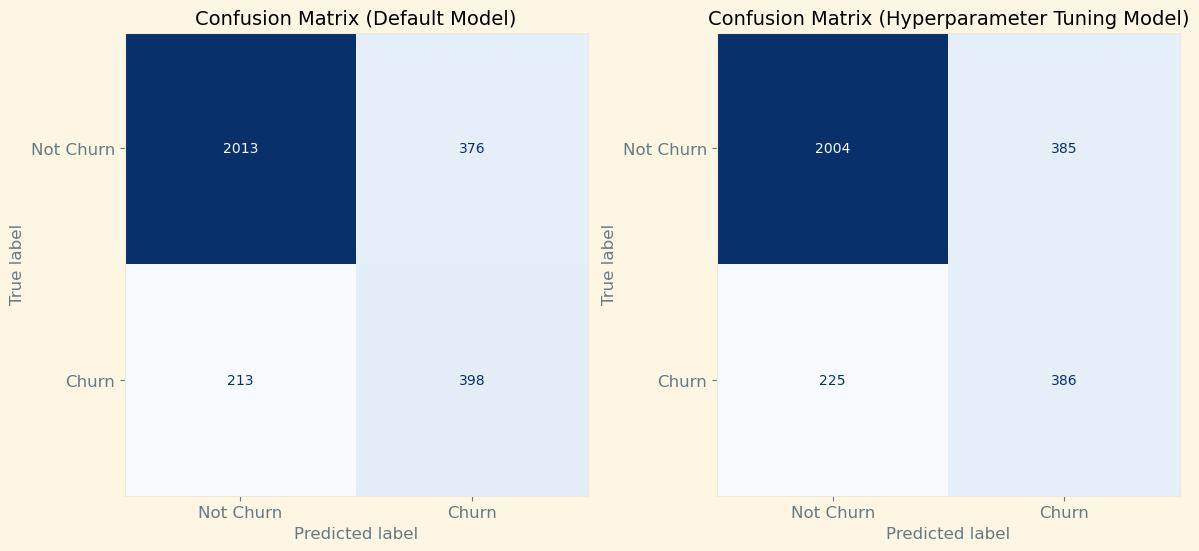

In [69]:
# Visualize the confusion matrix for both models side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Confusion matrix for model default
cm_default = confusion_matrix(y_test, xgboost_pipeline_predict_test)
disp_default = ConfusionMatrixDisplay(confusion_matrix=cm_default, display_labels=['Not Churn', 'Churn'])
disp_default.plot(ax=axes[0], cmap='Blues', values_format='d', colorbar=False)  # Disable colorbar
axes[0].set_title('Confusion Matrix (Default Model)', fontsize=14)
axes[0].tick_params(axis='both', labelsize=12)
axes[0].grid(False)  # Remove grid

# Confusion matrix for hyperparameter tuning model
cm_tuning = confusion_matrix(y_test, y_test_pred)
disp_tuning = ConfusionMatrixDisplay(confusion_matrix=cm_tuning, display_labels=['Not Churn', 'Churn'])
disp_tuning.plot(ax=axes[1], cmap='Blues', values_format='d', colorbar=False)  # Disable colorbar
axes[1].set_title('Confusion Matrix (Hyperparameter Tuning Model)', fontsize=14)
axes[1].tick_params(axis='both', labelsize=12)
axes[1].grid(False)  # Remove grid

plt.tight_layout()
plt.show()

**The XGBoost model** has the ability to **identify 398 positive cases (True Positive) and 2013 negative cases (True Negative).** However, **the model also suffers from errors in classification, especially in the case of False Positive (376) and False Negative (213).** False Positive indicates cases where the model incorrectly classifies a negative as positive, while False Negative indicates cases where the model incorrectly classifies positives as negatives.

**The XGBoost model with hyperparameter tuning was able to identify 386 positive cases (True Positive) and 2004 negative cases (True Negative).** There were errors in classification, namely False Positive (385) and False Negative (225). This shows that the model still has an error rate in classifying positive and negative cases.

**XGBoost models with Hyperparameter Tuning tend to focus more on being able to recognize truly churned customers**, but pay less attention to the balance between accurately predicting churned customers and distinguishing well between churned and non-churn customers overall. On the other hand, **XGBoost model without Hyperparameter Tuning shows a better balance between True Positive, True Negative, False Positive, and False Negative.**

**Our focus in creating this model is for the model to have a good balance between the ability to predict customer churn and differentiate between churned and non-churn customers overall.** Therefore, we consider the XGBoost model without Hyperparameter Tuning to be the best model for predicting potential customer churn .will use the XGBoost model without Hyperparameter Tuning.

### 8.4 weaknesses and strengths of the model

The advantages of the XGBoost model created are:

- The relatively high recall rate (0.831 on test data) shows that the model is able to identify the majority of customers who have the potential to churn.

The disadvantages of the XGBoost model created are:

- Overfitting: There is a significant difference between the model performance on test data and training data (0.831 vs 0.928), indicating overfitting. Models tend to "memorize" training data and are less able to generalize to new data.

- High Variability: High standard deviation in recall values for test data (0.060) and training data (0.007) indicates large variability in model performance. This indicates that the model is sensitive to changes in the dataset.

- High Classification Errors: The significant number of False Positives (376) and False Negatives (213) indicates that the model tends to make errors in classifying customers, either as potentially churning customers but not, or vice versa. This can result in inaccurate decisions and negatively impact business strategy.

- Thus, although the model has the advantage of a relatively high recall rate, disadvantages such as overfitting, high variability, and a significant misclassification rate need to be paid attention to and corrected to improve the performance and reliability of the model.

## 9. Model Saving

In [88]:
# Export the model
with open('model.pkl', 'wb') as file_1 :
    pickle.dump(xgboost_pipeline, file_1)

## 10. Model Inference

The Inference Model is at Customer_Churn_Inference.ipynb

## 11. Conclusion

Based on the dataset that we took about information about customer churn at a bank with a total of 10,000 data and a total of 14 columns. We have succeeded in creating a model that is used to predict whether a customer will churn (1) or a customer will not churn (0).
  
From the test results using 5 different models, namely using KNN, SVM, Decision Tree, Random Forest and XGBoost. We find that the results of the XGBoost model are the best compared to other models, because XGBoost has the highest average cross-validation score and also has the lowest standard deviation, which shows that its performance is quite consistent in various parts of the data set. However, because there are indications that the model is overfitting and its performance is imbalanced in test and train, we carry out tuning to compare model performance.

The XGBoost model successfully identified 398 true positive cases and 2013 true negative cases, but it also exhibited errors in classification, notably with 376 false positive and 213 false negative cases. On the other hand, the model with hyperparameter tuning improves true positive identification to 386 cases but introduces 385 false positive and 225 false negative cases. While the hyperparameter-tuned model prioritizes recognizing churned customers, it lacks balance in overall prediction accuracy. Therefore, for a balanced approach in predicting potential customer churn, the XGBoost model without hyperparameter tuning is preferred due to its better balance between true positive, true negative, false positive, and false negative rates.

The advantages of the XGBoost model created are:
- **The relatively high recall rate (0.831 on test data)** shows that the model is able to identify the majority of customers who have the potential to churn.

The disadvantages of the XGBoost model created are:
- **Overfitting:** There is a significant difference between model performance on test data and training data (0.831 vs 0.928), indicating overfitting. Models tend to "memorize" training data and are less able to generalize to new data.
- **High Variability:** High standard deviation in recall values for test data (0.060) and training data (0.007) indicates large variability in model performance. This indicates that the model is sensitive to changes in the dataset.
- **High Classification Error:** The significant number of False Positives (376) and False Negatives (213) indicates that the model tends to make errors in classifying customers, either as customers who have the potential to churn but do not, or vice versa. This can result in inaccurate decisions and negatively impact business strategy.

With these results, there are several suggestions that can be made to improve goods arriving on time, such as:
- **Use of Information for Customer Retention:** Banks can utilize information obtained from customer churn prediction models to design more effective customer retention strategies.
- **Customer Segmentation:** Based on churn prediction results, banks can segment customers to identify customer groups with high and low risk of churn.
- **Improved Customer Service and Experience:** Information about customer churn can provide banks with valuable insights into customer needs and preferences.
- **Model Evaluation and Improvement:** Banks can continue to evaluate and improve their customer churn prediction models by taking into account feedback and new data.
- **Integration with Wider Business Strategy:** Customer churn prediction models must be integrated with the bank's overall business strategy. This means ensuring that steps taken based on predicted results are aligned with business objectives and company values, and coordinated with broader customer retention initiatives.